In [1]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from matplotlib import pyplot
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from patsy import dmatrices
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
#Reading excel for ARIMA
df=pd.read_excel("Forecasting Assignment Data.xlsx","Sheet1",index_col=[0],parse_dates=True,squeeze=True)

In [10]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [14]:
a=df.filter(['Punjab'], axis=1)
# define input sequence
timeseries_data = np.array(a)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [16]:
X

array([[[119.9],
        [121.9],
        [118.8]],

       [[121.9],
        [118.8],
        [121. ]],

       [[118.8],
        [121. ],
        [121.4]],

       ...,

       [[124.4],
        [130.8],
        [129.4]],

       [[130.8],
        [129.4],
        [132.1]],

       [[129.4],
        [132.1],
        [132.1]]])

In [17]:
X.shape

(500, 3, 1)

In [18]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [19]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
16/16 [==============================] - 3s 6ms/step - loss: 22394.0762
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 16400.3086
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 4313.5781
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 2582.5093
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 2207.8582
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 1868.1709
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 1677.6448
Epoch 8/300
16/16 [==============================] - 0s 6ms/step - loss: 1464.2010
Epoch 9/300
16/16 [==============================] - 0s 6ms/step - loss: 1357.6862
Epoch 10/300
16/16 [==============================] - 0s 8ms/step - loss: 1254.8156
Epoch 11/300
16/16 [==============================] - 0s 6ms/step - loss: 1250.3734
Epoch 12/300
16/16 [==============================] - 0s 6ms/step - loss: 1280.7747

In [24]:
from array import array

In [27]:
y_input = np.array(a[-3:])

In [30]:
a[-3:]

,Punjab
Dates,
2020-03-12,132.1
2020-04-12,132.1
2020-05-12,120.4


In [34]:
# demonstrate prediction for next 10 days
x_input = np.array([132.1,132.1,120.4])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<90):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[118.75419]
1 day input [132.1        120.4        118.75418854]
1 day output [[116.25261]]
2 day input [120.4        118.75418854 116.25260925]
2 day output [[114.49947]]
3 day input [118.75419 116.25261 114.49947]
3 day output [[113.44973]]
4 day input [116.25261 114.49947 113.44973]
4 day output [[112.88647]]
5 day input [114.49947 113.44973 112.88647]
5 day output [[112.60275]]
6 day input [113.44973 112.88647 112.60275]
6 day output [[112.475716]]
7 day input [112.88647  112.60275  112.475716]
7 day output [[112.42169]]
8 day input [112.60275  112.475716 112.42169 ]
8 day output [[112.403015]]
9 day input [112.475716 112.42169  112.403015]
9 day output [[112.3967]]
10 day input [112.42169  112.403015 112.3967  ]
10 day output [[112.39592]]
11 day input [112.403015 112.3967   112.39592 ]
11 day output [[112.3959]]
12 day input [112.3967  112.39592 112.3959 ]
12 day output [[112.396484]]
13 day input [112.39592  112.3959   112.396484]
13 day output [[112.39664]]
14 day input [112.39

In [36]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [38]:
len(timeseries_data)

503

In [39]:
lst_output

[118.75419,
 116.25261,
 114.49947,
 113.44973,
 112.88647,
 112.60275,
 112.475716,
 112.42169,
 112.403015,
 112.3967,
 112.39592,
 112.3959,
 112.396484,
 112.39664,
 112.3969,
 112.396904,
 112.39699,
 112.396965,
 112.396996,
 112.39699,
 112.39698,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.396996,
 112.39697,
 112.39697,
 112.396996,
 112.39698,
 112.39697,
 112.

In [40]:
lst

NameError: ignored

ValueError: ignored

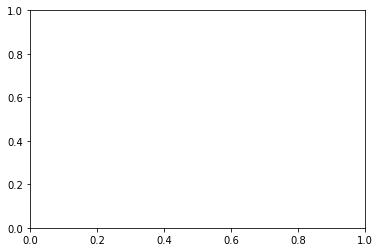

In [37]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)